<a href="https://colab.research.google.com/github/taylor-coleman/DS-Unit-1-Sprint-4-Linear-Algebra/blob/master/Linear_Algebra_Sprint_Challenge_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Linear Algebra

## 1.1 Graph vector $\vec{a}$ 

\begin{align}
\vec{a} = \begin{bmatrix} 3 \\ 2 \end{bmatrix}
\end{align}

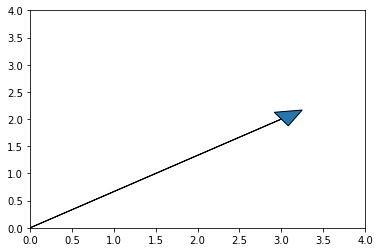

In [5]:
import matplotlib.pyplot as plt

plt.arrow(0,0, 3, 2,head_width=.3, head_length=0.3)
plt.xlim(0,4)          
plt.ylim(0,4)
plt.show()

## 1.2 Find $||\vec{b}||$. What does the norm of a vector represent?
\begin{align}
\vec{b} = \begin{bmatrix} 17 & -4 & -2 & 1\end{bmatrix}
\end{align}


In [8]:
import numpy as np
b = np.array([17,-4,-2,1])
print('Norm of b:', np.linalg.norm(b))

Norm of b: 17.60681686165901


The norm of a vector repressents the length or magnitude of that vector.

## 1.3 Find $\vec{c} \cdot \vec{d}$ - Are these vectors orthogonal? Why or why not?

\begin{align}
\vec{c} = \begin{bmatrix}3 & 7 & -2 & 12\end{bmatrix}
\qquad
\vec{d} = \begin{bmatrix}9 & -7 & 4 & 6\end{bmatrix}
\end{align}

In [11]:
c = np.array([3, 7, -2, 12])
d = np.array([9, -7, 4, 6])
print("Dot product of c and d: ", np.dot(c, d))

Dot product of c and d:  42


C and D are not orthogonal because the dot product does not equal 0.

## 1.4 Find $E^{-1}$ and $E^{T}$

\begin{align}
E = 
\begin{bmatrix}
    7 & 4 & 2 \\
    1 & 3 & -1 \\
    2 & 6 & -4
\end{bmatrix}
\end{align}

In [18]:
e = np.array([[7,4,2],
              [1,3,-1],
              [2,6,-4]])
print("\nInverse of E:\n", np.linalg.inv(e))
print("\nTranspose of E:\n", e.T)


Inverse of E:
 [[ 0.17647059 -0.82352941  0.29411765]
 [-0.05882353  0.94117647 -0.26470588]
 [ 0.          1.         -0.5       ]]

Transpose of E:
 [[ 7  1  2]
 [ 4  3  6]
 [ 2 -1 -4]]


# Intermediate Linear Algebra

## 2.1 Suppose that the number of customers at a ski resort as well as the number of inches of fresh powder (snow)  was recorded for 7 days. 

### Customers: [820, 760, 1250, 990, 1080, 1450, 1600]

### Inches of new snow: [0, 1, 7, 1, 0, 6, 4 ]

## Find the mean, variance, and standard deviation for both the number of customers and inches of new snow for the week. You may use library functions, dataframes, .describe(), etc. 



In [19]:
import pandas as pd

customers = [820, 760, 1250, 990, 1080, 1450, 1600]
snow = [0, 1, 7, 1, 0, 6, 4]

df = pd.DataFrame({'customers': customers, 'snow': snow})

df.head()

,customers,snow
0,820,0
1,760,1
2,1250,7
3,990,1
4,1080,0


In [24]:
# mean and std for customers and snow
df.describe()

,customers,snow
count,7.000000,7.000000
mean,1135.714286,2.714286
std,314.264069,2.927700
min,760.000000,0.000000
25%,905.000000,0.500000
50%,1080.000000,1.000000
75%,1350.000000,5.000000
max,1600.000000,7.000000


In [26]:
# Variance for customers and snow
print('Variance: ', df.var())

Variance:  customers    98761.904762
snow             8.571429
dtype: float64


## 2.2 Are the variances of the number of customers and inches of snow comparable? 
## Why or why not? 

The variances are not comparable because they are in differnet units.

## 2.3 Find the variance-covariance matrix for the number of customers and inches of snow at the ski resort. 

In [27]:
df.cov()

,customers,snow
customers,98761.904762,670.238095
snow,670.238095,8.571429


# PCA

## 3.1 Standardize the data so that it has a mean of 0 and a standard deviation of 1. (You may use library functions)

We have included some code to get you started so that you don't get stuck on something that isn't standardizing the data or PCA.

This might be helpful:

<https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html>

In [28]:
# Let me get you some data to start you off.
import pandas as pd

data = {"Country": ["England","Wales","Scotland","North Ireland"], 
        "Cheese": [105,103,103,66], 
        "Carcass_Meat": [245,227,242,267], 
        "Other_Meat": [685, 803, 750, 586], 
        "Fish": [147, 160, 122, 93], 
        "Fats_and_Oils": [193, 235, 184, 209], 
        "Sugars": [156, 175, 147, 139], 
        "Fresh_Potatoes": [720, 874, 566, 1033], 
        "Fresh_Veg": [253, 265, 171, 143], 
        "Other_Veg": [488, 570, 418, 355], 
        "Processed_Potatoes": [198, 203, 220, 187], 
        "Processed_Veg": [360, 365, 337, 334], 
        "Fresh_Fruit": [1102, 1137, 957, 674], 
        "Cereals": [1472, 1582, 1462, 1494], 
        "Beverages": [57,73,53,47], 
        "Soft_Drinks": [1374, 1256, 1572, 1506], 
        "Alcoholic Drinks": [375, 475, 458, 135], 
        "Confectionery": [54, 64, 62, 41]}

df = pd.DataFrame(data)

# Look at the data
df.head()

,Country,Cheese,Carcass_Meat,Other_Meat,Fish,Fats_and_Oils,Sugars,Fresh_Potatoes,Fresh_Veg,Other_Veg,Processed_Potatoes,Processed_Veg,Fresh_Fruit,Cereals,Beverages,Soft_Drinks,Alcoholic Drinks,Confectionery
0,England,105,245,685,147,193,156,720,253,488,198,360,1102,1472,57,1374,375,54
1,Wales,103,227,803,160,235,175,874,265,570,203,365,1137,1582,73,1256,475,64
2,Scotland,103,242,750,122,184,147,566,171,418,220,337,957,1462,53,1572,458,62
3,North Ireland,66,267,586,93,209,139,1033,143,355,187,334,674,1494,47,1506,135,41


In [0]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df1 = df.drop(columns='Country')
features = df1.columns
x = df1.loc[:,features].values
y = scaler.fit_transform(x)

## 3.2 Perform PCA on the data and graph Principal Component 1 against Principal Component 2. (You may use library functions)

This might be helpful:

<https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html>

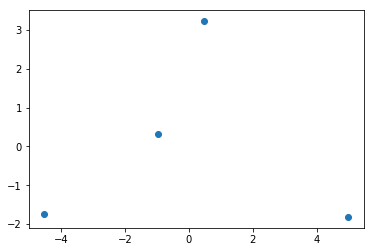

In [51]:
from sklearn.decomposition import PCA
pca = PCA(2)
pca.fit(y)
z = pca.transform(y)
df_pca = pd.DataFrame(data = z, columns=['PC1','PC2'])
plt.scatter(df_pca["PC1"], df_pca["PC2"]);

In [45]:
# PCA DataFrame
df_pca

,PC1,PC2
0,-0.954490,0.328318
1,-4.520951,-1.735380
2,0.487978,3.233672
3,4.987462,-1.826611


# Clustering

## 4.1 Use K-Means to cluster the following data and then graph your results. (You may use library functions)

We have included some code to get you started so that you don't get stuck on something that isn't standardizing clustering.

Prioritize calculating the clusters over graphing them. 

Scikit-Learn K-Means Documentation:

<https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html>

In [52]:
points = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/points.csv')
points.head()

,x,y
0,-7.846803,-3.421277
1,-3.554323,-6.884729
2,-0.192822,-9.671030
3,-6.401456,-5.223972
4,-0.804026,-9.704457


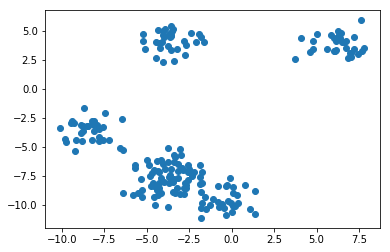

In [57]:
plt.scatter(points.x, points.y);

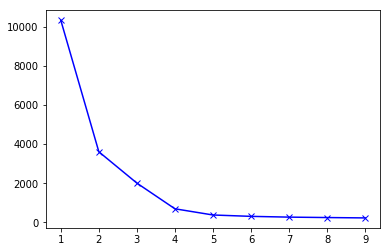

In [61]:
# Finding optimal K which looks like 4
from sklearn.cluster import KMeans

sum_of_squared_distances = []
K = range(1,10)
for k in K:
  km = KMeans(n_clusters=k)
  km = km.fit(points)
  sum_of_squared_distances.append(km.inertia_)
  
plt.plot(K, sum_of_squared_distances, 'bx-');

In [0]:
kmeans = KMeans(n_clusters = 4)
kmeans.fit(points)
labels = kmeans.labels_

In [67]:
new_series = pd.Series(labels)
points['clusters'] = new_series.values
points.head()

,x,y,clusters
0,-7.846803,-3.421277,3
1,-3.554323,-6.884729,0
2,-0.192822,-9.671030,0
3,-6.401456,-5.223972,3
4,-0.804026,-9.704457,0


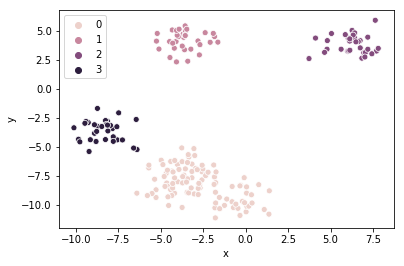

In [70]:
sns.scatterplot(x='x', y='y', hue=labels, data=points);